# Logistic Regression Coursework
This notebook is supposed to help with your understanding of the code by providing visual insights. It is not graded and solely for that purpose.

In [13]:
# Let's import your code and matplotlib
from logistic_regression_assignment import *
import matplotlib.pyplot as plt


%matplotlib inline


# Let's load some example data:
x, y, x_test = load_data()
D = x.shape[1]

In [48]:
%autoreload

## Random Prediction
This tests your prediction function.

In [49]:
np.matmul(np.array([1,2,23,3]),np.array([1,2,23,3]))

543

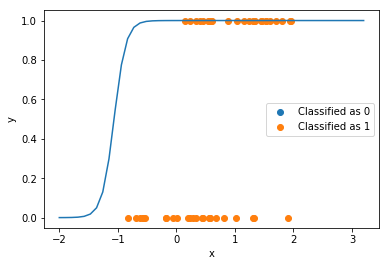

In [50]:
rn.seed(42)
theta = rn.normal(loc=10, size=(D, 1))
y_hat = predict_binary(x, theta).squeeze()
plt.scatter(x[y_hat < 0.5, 1], y[y_hat < 0.5])
plt.scatter(x[y_hat > 0.5, 1], y[y_hat > 0.5])
plt.legend(['Classified as 0', 'Classified as 1'])
plt.plot(x_test[:,1], predict(x_test, theta))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Maximum Likelihood Estimate
This tests your MLE and plots the predictions on the example data.

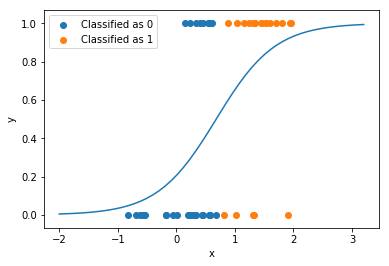

array([-1.35130992,  1.983651  ])

In [51]:
theta_ml = max_lik_estimate(x, y)
y_hat = predict_binary(x, theta_ml).squeeze()
plt.scatter(x[y_hat < 0.5, 1], y[y_hat < 0.5])
plt.scatter(x[y_hat > 0.5, 1], y[y_hat > 0.5])
plt.legend(['Classified as 0', 'Classified as 1'])
plt.plot(x_test[:,1], predict(x_test, theta_ml))
plt.xlabel('x')
plt.ylabel('y')
plt.show()
theta_ml

## Maximum A Posteriori
This tests your MAP solution and plots the predictions on the example data.

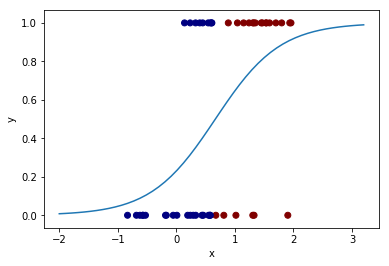

array([-1.20688967,  1.81202051])

In [52]:
m = np.zeros((D, 1))
S = 5 * np.eye(D)

theta_map = map_estimate(x, y, m, S)
y_hat = predict_binary(x, theta_map)
plt.scatter(x[:, 1], y, c=y_hat, cmap='jet')
plt.plot(x_test[:, 1], predict(x_test, theta_map))
plt.xlabel('x')
plt.ylabel('y')
plt.show()
theta_map

## Laplace Approximation
This tests your Laplace approximation and compares it to the true distribution.

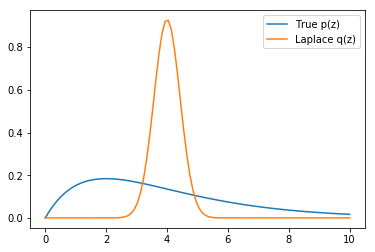

array([1.20230743e-19, 1.05181171e-18, 8.70503218e-18, 6.81573463e-17,
       5.04852924e-16, 3.53774879e-15, 2.34530331e-14, 1.47089257e-13,
       8.72715726e-13, 4.89862914e-12, 2.60127479e-11, 1.30679605e-10,
       6.21068221e-10, 2.79241983e-09, 1.18776912e-08, 4.77961875e-08,
       1.81955168e-07, 6.55307961e-07, 2.23273101e-06, 7.19676426e-06,
       2.19456304e-05, 6.33094813e-05, 1.72782344e-04, 4.46107864e-04,
       1.08965824e-03, 2.51797056e-03, 5.50453831e-03, 1.13841618e-02,
       2.22736369e-02, 4.12278910e-02, 7.21939852e-02, 1.19597148e-01,
       1.87434936e-01, 2.77901040e-01, 3.89798096e-01, 5.17248412e-01,
       6.49334577e-01, 7.71165878e-01, 8.66437002e-01, 9.20950077e-01,
       9.26072734e-01, 8.80975879e-01, 7.92853320e-01, 6.75043239e-01,
       5.43726182e-01, 4.14322779e-01, 2.98680787e-01, 2.03697489e-01,
       1.31423786e-01, 8.02180655e-02, 4.63212538e-02, 2.53045337e-02,
       1.30775468e-02, 6.39387495e-03, 2.95741250e-03, 1.29410520e-03,
      

In [53]:
z = np.linspace(0,10,100)
p = stats.chi2.pdf(z, 4)

q = laplace_q(z)
plt.plot(z, p)
plt.plot(z, q)
plt.legend(['True p(z)', 'Laplace q(z)'])
plt.show()
q

## Laplace Approximation of Logistic Regression
This tests your Laplace approximation of the logistic regression an plots multiple sample regressions.

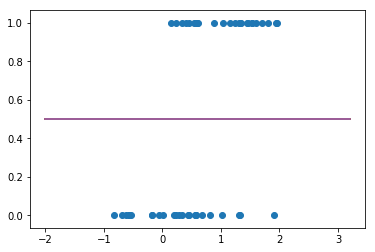

In [54]:
m = np.zeros((D, 1))
S = 5*np.eye(D)
nb_samples = 5

theta_map, S_post = get_posterior(x, y, m, S)
plt.scatter(x[:,1], y)
for i in range(nb_samples):
    th = np.random.multivariate_normal(theta_map.squeeze(), S_post)
    plt.plot(x_test[:,1], predict(x_test, th))
plt.show()

## Metropolis Sampling
This compares your Metropolis sampling to the Laplace posterior.

LinAlgError: singular matrix

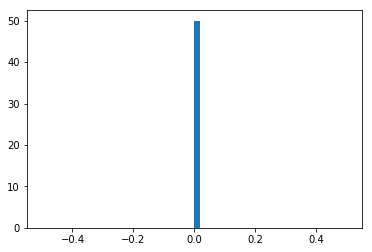

In [7]:
nb_iter = 10000
samples = metropolis_hastings_sample(x, y, m, S, nb_iter)

_,_,h1 = plt.hist(samples[:,1], bins=50, density=True)
h2, = plt.plot(np.linspace(0,10),
         stats.multivariate_normal.pdf(np.linspace(0,10), theta_map[1], S_post[1,1]), 'r')
plt.legend([h1[0], h2], ['Metropolis samples', 'Laplace posterior'])
plt.xlabel('theta')
plt.show()